# This is a **(quite) cleared** version of notebook used during data preparation. Something may not work!

In [66]:
from sklearn.metrics.pairwise import (
    cosine_similarity,
    linear_kernel,
    rbf_kernel)

from sklearn.preprocessing import minmax_scale

In [ ]:
import pandas as pd
import numpy as np
import pickle
import gzip
import tracemalloc
import time

In [ ]:
with gzip.open("../data/anilist_transformed.gz", "rb") as f:
    df = pickle.load(f)

In [17]:
meta = df.dtypes.to_frame().reset_index().rename({'index': 'column_name', 0: 'dtype'}, axis=1)

In [23]:
meta.loc[meta.column_name.str.startswith('genres_'), 'column_name'] = 'genres'

In [24]:
meta.loc[meta.column_name.str.startswith('producers_'), 'column_name'] = 'producers'

In [54]:
meta.loc[meta.column_name.str.startswith('tags_'), 'column_name'] = 'tags'

In [26]:
meta.loc[meta.column_name.str.startswith('source_'), 'column_name'] = 'source'

In [30]:
meta.loc[meta.column_name.str.startswith('studios_'), 'column_name'] = 'studios'

In [34]:
meta.loc[meta.column_name.str.startswith('format_'), 'column_name'] = 'format'

In [35]:
meta.loc[meta.column_name.str.startswith('season_'), 'column_name'] = 'season'

In [37]:
meta.loc[meta.column_name.str.startswith('episodes_'), 'column_name'] = 'episodes'

In [39]:
meta.loc[meta.column_name.str.startswith('origin_'), 'column_name'] = 'origin'

In [41]:
meta.loc[meta.column_name.str.startswith('is_adult'), 'column_name'] = 'is_adult'

In [42]:
meta.column_name.value_counts()

producers              1327
studios                 839
tag                     337
genres                   19
source                   16
format                    7
episodes                  5
origin                    5
season                    4
is_adult                  2
index                     1
title                     1
favorites                 1
popularity                1
mean_score                1
duration                  1
release_date              1
end_date                  1
description_cleaned       1
Name: column_name, dtype: int64

In [66]:
columns = ['tags']

In [67]:
df.iloc[:, meta[meta.column_name.isin(columns)].index]

,tags_4-koma,tags_Achromatic,tags_Achronological Order,tags_Acting,tags_Adoption,tags_Advertisement,tags_Afterlife,tags_Age Gap,tags_Age Regression,tags_Agender,...,tags_Witch,tags_Work,tags_Wrestling,tags_Writing,tags_Wuxia,tags_Yakuza,tags_Yandere,tags_Youkai,tags_Yuri,tags_Zombie
0,0.0,0.790039,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,0.0,0.199951,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,0.0,0.790039,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.119995,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.22998,0.0,0.0,0.0
16710,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
16711,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
16712,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


Int64Index([0, 2532, 2533, 2534, 2535, 2536, 2537, 2538], dtype='int64')

In [102]:
with gzip.open("../data/anilist_transformed_meta.gz", "wb") as f:
    pickle.dump(meta, f)

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Columns: 2570 entries, index to description_cleaned
dtypes: datetime64[ns](2), float16(337), float64(4), int32(1), object(2), uint8(2224)
memory usage: 52.7 MB


In [62]:
(res_matrix[:1000]).nbytes // 10**6

133

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Columns: 2570 entries, index to description_cleaned
dtypes: datetime64[ns](2), float16(337), float64(4), int32(1), object(2), uint8(2224)
memory usage: 52.7 MB


In [73]:
p = df.loc[:, 'duration':'source_web novel']

In [96]:
p.dtypes

duration               float64
mean_score             float64
popularity             float64
favorites              float64
tags_4-koma            float16
                        ...   
source_picture book      uint8
source_unspecified       uint8
source_video game        uint8
source_visual novel      uint8
source_web novel         uint8
Length: 2565, dtype: object

In [135]:
rng = np.random.default_rng()
idx = rng.choice(16714, size=16714, replace=False)
scores = np.random.randint(1, 10, 16714).reshape(-1, 1)
vals = p.values

In [140]:
idx_sorted = np.sort(idx)
scores_sorted = scores[np.argsort(idx)]

# max RAM

In [270]:
start = time.time()
tracemalloc.start()

res_matrix = minmax_scale(((linear_kernel(vals[idx], vals) * scores).sum(axis=0) / scores.sum()).T)

end = time.time()
_, peak = tracemalloc.get_traced_memory()
print(f"Peak {peak / 10**6:.2f} MB Time {end-start:.2f}s")
tracemalloc.stop()

Peak 4470.09 MB Time 5.31s


# compressed matrix

In [217]:
start = time.time()
tracemalloc.start()

minmax_scale(((linear_kernel(vals[idx], vals).astype(np.float16) * scores).sum(axis=0) / scores.sum()).T)

end = time.time()
_, peak = tracemalloc.get_traced_memory()
print(f"Peak {peak / 10**6:.2f} MB Time {end-start:.2f}s")
tracemalloc.stop()

Peak 2793.86 MB Time 6.75s


# chuncked data

In [265]:
gen_size=16714
rng = np.random.default_rng()
idx = rng.choice(16714, size=gen_size, replace=False)
scores = np.random.randint(1, 10, gen_size).reshape(-1, 1)
vals = p.values
idx_sorted = np.sort(idx)
scores_sorted = scores[np.argsort(idx)]

In [284]:
def calculate_vector(vals, idx_part, scores_part):
    return ((linear_kernel(vals[idx_part], vals).astype(np.float16) * scores_part).sum(axis=0) / scores_part.sum()).T

In [285]:
CHUNK_SIZE = 1000

In [286]:
start = time.time()
tracemalloc.start()

res_vector = np.zeros((16714, ))

for i in range(1, int(np.round(idx.shape[0]/CHUNK_SIZE)+1)):
    # implement interruption method
    idx_part = idx_sorted[(i-1)*CHUNK_SIZE:i*CHUNK_SIZE]
    scores_part = scores_sorted[(i-1)*CHUNK_SIZE:i*CHUNK_SIZE]
    res_vector += calculate_vector(vals, idx_part, scores_part)

minmax_scale(res_vector)    
    
end = time.time()
_, peak = tracemalloc.get_traced_memory()
print(f"Peak {peak / 10**6:.2f} MB Time {end-start:.2f}s") 
tracemalloc.stop()

Peak 167.56 MB Time 7.75s


In [287]:
res_matrix == minmax_scale(res_vector)

array([False, False, False, ..., False, False, False])

In [288]:
np.corrcoef(res_matrix, minmax_scale(res_vector))

array([[1.        , 0.99948895],
       [0.99948895, 1.        ]])

In [5]:
sim = cosine_similarity(p, p)
sim2 = rbf_kernel(p, p)

In [7]:
sim1 = linear_kernel(p, p)

In [6]:
sim3 = polynomial_kernel(p,p)

In [7]:
sim4 = pairwise_kernels(p,p)

In [8]:
sim5 = sigmoid_kernel(p,p)

In [291]:
res_matrix = linear_kernel(vals, vals)

In [356]:
def display_res(idx):
    r = pd.concat([
        #df.iloc[np.argsort(-sim[idx])[:50]].title.reset_index(drop=True),
        #df.iloc[np.argsort(-sim1[idx])[:50]].title.reset_index(drop=True),
        #df.iloc[np.argsort(-new_matrix)[:50]].title.reset_index(drop=True),
        #df.iloc[np.argsort(-new_matrix1)[:50]].title.reset_index(drop=True),
        
        #df.iloc[np.argsort(-res_matrix[idx])[:50]].title.reset_index(drop=True),
        df.iloc[np.argsort(-res_vector)[:50]].title.reset_index(drop=True),
        
        #df.iloc[np.argsort(-sim2[idx])[:50]].title.reset_index(drop=True),
        #df.iloc[np.argsort(-sim3[idx])[:50]].title.reset_index(drop=True),
        #df.iloc[np.argsort(-sim4[idx])[:50]].title.reset_index(drop=True),
        #df.iloc[np.argsort(-sim5[idx])[:50]].title.reset_index(drop=True),
    ], axis=1, ignore_index=True)

    #r.columns = ['cosine_similarity', 'linear_kernel', 'tmp', 'rbf_kernel', 'polynomial_kernel', 'pairwise_kernels', 'sigmoid_kernel']
    r.columns = ['tmp']
    return r

In [20]:
genres_columns = [col for col in df if col.startswith('genres_')]
tags_columns = [col for col in df if col.startswith('tag_')]

In [31]:
new_matrix.shape

(1, 16714)

In [33]:
import pickle
with open('tmp.pickle', 'wb') as f:
    pickle.dump(new_matrix, f, protocol=pickle.HIGHEST_PROTOCOL)

In [43]:
df.iloc[np.argsort(-new_matrix[14464])[-5010: -5000]].title.reset_index(drop=True)

0                              Kiddy Grade: Truth Dawn
1                                   Ojou-sama Sousamou
2                                              Xiangsi
3                Hetalia Axis Powers: Paint it, White!
4                       Sei Yariman Gakuen Enkou Nikki
5                         Mizugi Kanojo: THE ANIMATION
6                                     Recruit Rhapsody
7    PriPara & Kiratto Pri☆Chan: Kira Kira Memorial...
8                 Godzilla: City on the Edge of Battle
9                               Last Night, Good Night
Name: title, dtype: object

In [38]:
new_matrix[14464][np.argsort(-new_matrix[14464])[-10: -1]]

array([0.00308614, 0.00272969, 0.0026254 , 0.00204178, 0.00197158,
       0.00181448, 0.00160978, 0.00072544, 0.00043264])

In [48]:
new_matrix[14649][np.argsort(-new_matrix[14649])[:10]]

array([1.        , 0.50883691, 0.48636488, 0.48320411, 0.48269402,
       0.47792404, 0.47557801, 0.47172547, 0.4712391 , 0.46701869])

# Recommendation examples using different functions (description not used)

In [49]:
display_res(14649)

,cosine_similarity,linear_kernel,rbf_kernel,polynomial_kernel,pairwise_kernels,sigmoid_kernel
0,Blue Period,Blue Period,Blue Period,Blue Period,Blue Period,Blue Period
1,Funbari Onsen Hanjouki,Grand Blue Dreaming,Funbari Onsen Hanjouki,Grand Blue Dreaming,Grand Blue Dreaming,Grand Blue Dreaming
2,Dance Dance Danseur,A Silent Voice,Nanatsu no Taizai: Tsumi no Kokuhaku Dennou Gr...,A Silent Voice,A Silent Voice,A Silent Voice
3,GA Geijutsuka Art Design Class,Kaguya-sama: Love is War -Ultra Romantic-,Coffee Ikaga Deshou,Kaguya-sama: Love is War -Ultra Romantic-,Kaguya-sama: Love is War -Ultra Romantic-,Kaguya-sama: Love is War -Ultra Romantic-
4,Smile Down the Runway,Kaguya-sama: Love is War?,Otousan wa Ai no Hito,Kaguya-sama: Love is War?,Kaguya-sama: Love is War?,Kaguya-sama: Love is War?
5,Kotaro Lives Alone,ReLIFE,Chikai,ReLIFE,ReLIFE,ReLIFE
6,Grand Blue Dreaming,Dance Dance Danseur,Fastest Finger First,Dance Dance Danseur,Dance Dance Danseur,Dance Dance Danseur
7,Fastest Finger First,given,Osiris no Tenbin,given,given,given
8,Silver Spoon Season 2,Silver Spoon,Peach Boy Riverside Mini Anime,Silver Spoon,Silver Spoon,Silver Spoon
9,Sweet Blue Flowers,O Maidens in Your Savage Season,Yakiniku-ten Sengoku,O Maidens in Your Savage Season,O Maidens in Your Savage Season,O Maidens in Your Savage Season


# Recommendation examples using single title  (description not used)

In [318]:
res_df = pd.concat([
                    display_res(3135),
                    display_res(5403),
                    display_res(9277),
                    display_res(14464),
                    display_res(7436),
                    display_res(9985),
                    display_res(16670)
                   ], 
                   axis=1)

res_df.columns = res_df.iloc[0]
res_df.drop(res_df.index[0])

,Berserk,Death Note,JoJo's Bizarre Adventure: Stardust Crusaders,Mushoku Tensei: Jobless Reincarnation,Steins;Gate,Prison School,Redo of Healer
1,Berserk: The Golden Age Arc III - The Advent,Monster,JoJo's Bizarre Adventure: Stardust Crusaders -...,Mushoku Tensei: Jobless Reincarnation Cour 2,Steins;Gate 0,SHIMONETA: A Boring World Where the Concept of...,The Rising of the Shield Hero
2,VINLAND SAGA,Hunter x Hunter (2011),JoJo's Bizarre Adventure (TV),Mushoku Tensei: Jobless Reincarnation Cour 2 -...,Steins;Gate The Movie – Load Region of Déjà Vu,Sekirei,The World's Finest Assassin Gets Reincarnated ...
3,Yona of the Dawn,BABYLON,JoJo's Bizarre Adventure: Golden Wind,Re:ZERO -Starting Life in Another World- Seaso...,Re:ZERO -Starting Life in Another World-,The Familiar of Zero,Re:ZERO -Starting Life in Another World- Seaso...
4,Parasyte -the maxim-,Moriarty the Patriot Part 2,JoJo's Bizarre Adventure: Diamond is Unbreakable,Re:ZERO -Starting Life in Another World- Season 2,Steins;Gate 0: 23β- Divide by Zero,Girls Bravo,Re:ZERO -Starting Life in Another World- Season 2
5,Berserk,Moriarty the Patriot,JoJo's Bizarre Adventure: STONE OCEAN,The Rising of the Shield Hero,When They Cry,Monster Musume: Everyday Life With Monster Girls,High School DxD
6,Fullmetal Alchemist: Brotherhood,Kaiji - Ultimate Survivor,Demon Slayer: Kimetsu no Yaiba,"No Game, No Life",Texhnolyze,Food Wars! The Second Plate,The Rising of the Shield Hero Season 2
7,Berserk: The Golden Age Arc II - The Battle fo...,Death Parade,Fullmetal Alchemist: Brotherhood,The World's Finest Assassin Gets Reincarnated ...,Code Geass: Lelouch of the Rebellion R2,Back Street Girls -GOKUDOLS-,Arifureta: From Commonplace to World's Strongest
8,Attack on Titan Final Season,Platinum End,JoJo's Bizarre Adventure (2000),The Familiar of Zero F,Puella Magi Madoka Magica,Uzaki-chan Wants to Hang Out!,The Misfit of Demon King Academy: History’s St...
9,Berserk 2,The Future Diary,Tokyo Revengers,The Familiar of Zero,PSYCHO-PASS,How NOT to Summon a Demon Lord,Arifureta: From Commonplace to World's Stronge...
10,Naruto: Shippuden,One-Punch Man,My Hero Academia Season 3,The Misfit of Demon King Academy: History’s St...,Shin Seiki Evangelion,The Demon Girl Next Door,The Greatest Demon Lord Is Reborn as a Typical...


In [319]:
df[df.title.str.lower().str.contains('redo')]

,index,title,end_date,release_date,duration,mean_score,popularity,favorites,tags_4-koma,tags_Achromatic,...,source_multimedia project,source_novel,source_original,source_other,source_picture book,source_unspecified,source_video game,source_visual novel,source_web novel,description_cleaned
8024,3785,Evangelion: 3.0 You Can (Not) Redo,2012-11-17,2012-11-17,0.399160,0.792683,0.118627,0.024718,0.0,0.0,...,0,0,1,0,0,0,0,0,0,14 year third impact ikari shinji awakens worl...
14487,143380,Polar Bear Bears Boredom,2021-08-14,2021-08-14,0.025210,0.560976,0.000078,0.000000,0.0,0.0,...,0,0,1,0,0,0,0,0,0,polar bear bored various marine animal deep bl...
14758,140689,SHAREDOL,2021-10-25,2021-10-25,0.008403,0.707317,0.000815,0.000036,0.0,0.0,...,0,0,1,0,0,0,0,0,0,sharedol fusion two idea selected 15 proposal ...
16670,113425,Redo of Healer,2021-03-31,2021-01-13,0.096639,0.573171,0.147362,0.036035,0.0,0.0,...,0,0,0,0,0,0,0,0,0,dark world monster adventurer mages gifted hea...


In [69]:
mapping = {key: value for value, key in df.reset_index().iloc[:, :2].values.tolist()}

In [69]:
mapping

{104354: 0,
 104418: 1,
 6843: 2,
 9521: 3,
 102526: 4,
 6844: 5,
 6848: 6,
 140635: 7,
 104360: 8,
 3990: 9,
 6857: 10,
 140019: 11,
 2765: 12,
 15455: 13,
 7524: 14,
 109364: 15,
 103729: 16,
 104424: 17,
 5662: 18,
 12603: 19,
 102091: 20,
 6846: 21,
 104421: 22,
 7526: 23,
 6847: 24,
 138727: 25,
 10743: 26,
 7527: 27,
 143306: 28,
 109363: 29,
 7528: 30,
 7529: 31,
 113264: 32,
 114344: 33,
 113268: 34,
 7530: 35,
 138916: 36,
 104417: 37,
 143713: 38,
 7531: 39,
 138305: 40,
 113178: 41,
 114440: 42,
 102392: 43,
 138778: 44,
 114305: 45,
 7532: 46,
 126204: 47,
 138920: 48,
 11447: 49,
 121667: 50,
 16063: 51,
 103936: 52,
 6993: 53,
 113179: 54,
 126205: 55,
 19125: 56,
 126177: 57,
 9850: 58,
 129379: 59,
 129463: 60,
 4513: 61,
 138779: 62,
 104419: 63,
 143892: 64,
 114439: 65,
 7621: 66,
 129165: 67,
 120758: 68,
 6994: 69,
 16007: 70,
 120759: 71,
 4948: 72,
 114335: 73,
 120774: 74,
 109330: 75,
 104215: 76,
 120770: 77,
 112305: 78,
 4481: 79,
 7021: 80,
 120773: 81,
 12

In [70]:
with open('../data/id-score.pickle', 'rb') as f:
    my_scores = pickle.load(f)

In [ ]:
[[ids, score] for ids, score in my_scores]

In [70]:
l: list[int] = [0]

In [337]:
my_scores

[[103572, 6],
 [109287, 6],
 [1292, 9],
 [116566, 9],
 [11111, 7],
 [112444, 5],
 [100668, 4],
 [111729, 4],
 [110547, 7],
 [21665, 5],
 [107660, 9],
 [114194, 7],
 [13535, 8],
 [110354, 8],
 [21234, 6],
 [21459, 8],
 [21856, 7],
 [100166, 8],
 [104276, 7],
 [100723, 7],
 [105893, 7],
 [130183, 7],
 [20529, 6],
 [103900, 6],
 [110229, 6],
 [109492, 5],
 [20997, 4],
 [97880, 7],
 [1575, 9],
 [2904, 10],
 [12549, 5],
 [99423, 3],
 [105190, 7],
 [14353, 7],
 [97907, 6],
 [1535, 9],
 [2994, 9],
 [20931, 7],
 [110353, 6],
 [122137, 7],
 [124612, 7],
 [112818, 4],
 [103139, 7],
 [105228, 10],
 [101347, 8],
 [107226, 7],
 [226, 10],
 [105310, 9],
 [114236, 9],
 [114888, 6],
 [108241, 8],
 [101165, 6],
 [17895, 8],
 [100922, 7],
 [110349, 9],
 [245, 8],
 [17729, 5],
 [106319, 4],
 [15809, 7],
 [8074, 7],
 [9515, 7],
 [934, 7],
 [108268, 7],
 [113693, 7],
 [113811, 6],
 [431, 9],
 [110350, 9],
 [97922, 9],
 [110270, 6],
 [112443, 6],
 [14719, 9],
 [20474, 9],
 [20799, 9],
 [21450, 9],
 [102883,

In [71]:
my_scores_remapped = {mapping[ids]: score for ids, score in my_scores if ids in mapping.keys()}

In [74]:
cols = [col for col in p.columns if 'tags_' in col]

In [75]:
idx = np.array(list(my_scores_remapped.keys()))
scores = np.array(list(my_scores_remapped.values())).reshape(-1, 1)

vals = p[cols].values

idx_sorted = np.sort(idx)
scores_sorted = scores[np.argsort(idx)]

In [101]:
meta[meta.column_name =='tags']

,column_name,dtype
8,tags,float16
9,tags,float16
10,tags,float16
11,tags,float16
12,tags,float16
...,...,...
340,tags,float16
341,tags,float16
342,tags,float16
343,tags,float16


In [432]:
res_vector = np.zeros((16714, ))

n_iters = int(np.round(idx.shape[0]/CHUNK_SIZE)) if idx.shape[0] >= CHUNK_SIZE else 1

for i in range(1, n_iters+1):
    # implement interruption method
    idx_part = idx_sorted[(i-1)*CHUNK_SIZE:i*CHUNK_SIZE]
    scores_part = scores_sorted[(i-1)*CHUNK_SIZE:i*CHUNK_SIZE]
    res_vector += calculate_vector(vals, idx_part, scores_part)   

In [107]:
scores.shape

(238, 1)

In [105]:
df.iloc[np.argsort(-my_res), :].reset_index()

,level_0,index,title,end_date,release_date,duration,mean_score,popularity,favorites,tags_4-koma,...,source_multimedia project,source_novel,source_original,source_other,source_picture book,source_unspecified,source_video game,source_visual novel,source_web novel,description_cleaned
0,6626,5114,Fullmetal Alchemist: Brotherhood,2010-07-04,2009-04-05,0.100840,0.975610,0.707763,0.737695,0.0,...,0,0,0,0,0,0,0,0,0,order something obtained something equal value...
1,13813,110277,Attack on Titan Final Season,2021-03-29,2020-12-07,0.096639,0.939024,0.606381,0.332776,0.0,...,0,0,0,0,0,0,0,0,0,four year since scout regiment reached shoreli...
2,13304,101348,VINLAND SAGA,2019-12-30,2019-07-08,0.096639,0.939024,0.416101,0.335004,0.0,...,0,0,0,0,0,0,0,0,0,thorfinn son one viking greatest warrior fathe...
3,9099,17074,Monogatari Series Second Season,2013-12-29,2013-07-07,0.105042,0.951220,0.191791,0.148955,0.0,...,0,0,0,0,0,0,0,0,0,second season monogatari series part 12 contai...
4,3135,33,Berserk,1998-03-31,1997-10-07,0.100840,0.890244,0.137245,0.093285,0.0,...,0,0,0,0,0,0,0,0,0,set time much resembles europe middle age bers...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,8955,103474,Black Ocean,2013-03-16,2013-03-16,0.016807,0.341463,0.000248,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,music video hamauzu masashi imeruats song blac...
16710,8954,103708,Encounters with that Kind,2013-06-10,2013-05-13,0.016807,0.402439,0.000101,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,corner universe small planet creature called m...
16711,8944,131563,Pleasant Goat and Big Big Wolf: The Mythical A...,2013-01-24,2013-01-24,0.357143,0.548780,0.000049,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,face impending disaster animal world looking m...
16712,8857,104337,Against,2013-04-14,2013-04-14,0.000000,0.414634,0.000199,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,short animation yukie nakauchi


In [121]:
idx

array([13026, 13700,  5789, 13837,  8341, 13592, 13431, 13314, 13683,
       12041, 13340, 14817,  8243, 13735, 11263, 10961, 11626, 12533,
       13353, 12284, 13197, 11602,  9218, 12776, 12770, 13276, 10214,
       13253,  5310,  6142,  8300, 12715, 13903,  8710, 12331,  5403,
        5729,  9921, 14088, 13665, 14247, 13461, 13234, 13705, 13444,
       12857,  4538, 13177, 13789, 13848, 14033, 12102,  8996, 12214,
       13637,  3470,  9474, 13805,  8644,  7249,  7832,  5495, 12860,
       13641, 13708,  4762, 14072, 11554, 16647, 14726,  7974,  9277,
       10002, 11272, 12283, 14073, 10405, 13029, 14252, 13643,  7077,
        7356, 11743, 13003, 13620, 13977, 13761, 13369, 14047, 10608,
       13795,  9524,  8268,  8085, 10828, 11737, 13052, 13443,  4630,
       11310, 13828, 13525, 13499,  8891, 10818, 12827,  3141, 10435,
       10569, 13906, 14464,  9437, 12394,  2871,  9589, 12911, 13453,
       13458,  9695, 10315, 13194,  9385, 10099,  6587,  6732, 10464,
       13798,  8740,

In [157]:
idx

array([13026, 13700,  5789, 13837,  8341, 13592, 13431, 13314, 13683,
       12041, 13340, 14817,  8243, 13735, 11263, 10961, 11626, 12533,
       13353, 12284, 13197, 11602,  9218, 12776, 12770, 13276, 10214,
       13253,  5310,  6142,  8300, 12715, 13903,  8710, 12331,  5403,
        5729,  9921, 14088, 13665, 14247, 13461, 13234, 13705, 13444,
       12857,  4538, 13177, 13789, 13848, 14033, 12102,  8996, 12214,
       13637,  3470,  9474, 13805,  8644,  7249,  7832,  5495, 12860,
       13641, 13708,  4762, 14072, 11554, 16647, 14726,  7974,  9277,
       10002, 11272, 12283, 14073, 10405, 13029, 14252, 13643,  7077,
        7356, 11743, 13003, 13620, 13977, 13761, 13369, 14047, 10608,
       13795,  9524,  8268,  8085, 10828, 11737, 13052, 13443,  4630,
       11310, 13828, 13525, 13499,  8891, 10818, 12827,  3141, 10435,
       10569, 13906, 14464,  9437, 12394,  2871,  9589, 12911, 13453,
       13458,  9695, 10315, 13194,  9385, 10099,  6587,  6732, 10464,
       13798,  8740,

array([    0,     1,     2, ..., 16711, 16712, 16713])

In [191]:
df.iloc[6626]

index                                                               5114
title                                   Fullmetal Alchemist: Brotherhood
end_date                                             2010-07-04 00:00:00
release_date                                         2009-04-05 00:00:00
duration                                                         0.10084
                                             ...                        
source_unspecified                                                     0
source_video game                                                      0
source_visual novel                                                    0
source_web novel                                                       0
description_cleaned    order something obtained something equal value...
Name: 6626, Length: 2570, dtype: object

In [249]:
np.argwhere(~np.isin(np.arange(my_res.size), idx)).flatten()

array([    0,     1,     2, ..., 16711, 16712, 16713], dtype=int64)

In [283]:
np.argsort(-my_res)[~np.isin(np.argsort(-my_res), idx)]

array([6626, 9099, 7877, ..., 8944, 8857, 8356], dtype=int64)

In [300]:
-np.sort(-my_res)

array([3.14037072, 3.05258196, 2.82861866, ..., 0.        , 0.        ,
       0.        ])

In [295]:
pd.concat([df.iloc[:5, :5], asdf], axis=1)

,index,title,end_date,release_date,duration,0
0,104354,Namake Gitsune,1941-09-24,1941-09-24,0.042017,1.000000
1,104418,Doubutsu Tonarigumi,1941-09-24,1941-09-24,0.037815,0.897514
2,6843,Kangaroo no Tanjoubi,1941-02-15,1941-02-15,0.033613,0.808484
3,9521,Tie Shan Gongzhu,1941-01-01,1941-01-01,0.302521,0.808306
4,102526,Ari-chan,1941-09-24,1941-09-24,0.042017,0.774746


array([1.        , 0.89751351, 0.80848373, 0.80830572, 0.77474575])

In [275]:
np.setdiff1d(, np.argwhere(np.isin(np.arange(my_res.size), idx)).flatten())

array([    0,     1,     2, ..., 16711, 16712, 16713], dtype=int64)

In [126]:
res_idx_desc = np.argsort(-my_res)

In [138]:
res_idx_excl = np.argwhere(~np.isin(res_idx_desc, idx)).flatten()

In [139]:
res_idx_desc_excluded = np.argsort(-my_res[res_idx_excl])

In [140]:
res_idx_desc_excluded

array([ 6392, 13575, 13066, ...,  8843,  8888,  8237], dtype=int64)

In [284]:
df.iloc[9099]

index                                                              17074
title                                    Monogatari Series Second Season
end_date                                             2013-12-29 00:00:00
release_date                                         2013-07-07 00:00:00
duration                                                        0.105042
                                             ...                        
source_unspecified                                                     0
source_video game                                                      0
source_visual novel                                                    0
source_web novel                                                       0
description_cleaned    second season monogatari series part 12 contai...
Name: 9099, Length: 2570, dtype: object

In [117]:
my_res[6626]

3.1403707192397454

In [111]:
my_res

array([0.        , 0.00601138, 0.01804149, ..., 0.01320911, 0.28272707,
       0.33546321])

In [ ]:
sca

In [83]:
my_res = ( linear_kernel(vals[idx], vals).astype(np.float16) * scores ).sum(axis=0) / sum(scores)

In [84]:
tmp = df.iloc[np.argsort(-my_res)].reset_index()

In [85]:
tmp[~tmp['level_0'].isin(idx)].iloc[:50].title.to_frame()

,title
0,Fullmetal Alchemist: Brotherhood
3,Monogatari Series Second Season
7,From the New World
8,Naruto: Shippuden
14,Platinum End
19,Higurashi: When They Cry - GOU
20,Black Clover
21,Kill la Kill
24,My Hero Academia Season 5
28,Neon Genesis Evangelion: The End of Evangelion


In [442]:
new_df[~new_df['level_0'].isin(idx)].iloc[:50].title.to_frame()

,title
2,Fullmetal Alchemist: Brotherhood
3,Naruto: Shippuden
12,Re:ZERO -Starting Life in Another World- Seaso...
13,Monogatari Series Second Season
17,Naruto
19,Seraph of the End: Vampire Reign
20,Fruits Basket The Final Season
21,Re:ZERO -Starting Life in Another World- Season 2
26,Akame ga Kill!
27,Kaguya-sama: Love is War -Ultra Romantic-


In [480]:
scores_transformed = mm.transform(scores_sorted)

In [433]:
res_vector

array([2.90247384, 3.29564971, 3.25193593, ..., 2.36285085, 3.25565134,
       2.25329934])

In [440]:
my_res

array([2.89189613, 3.31198731, 3.21514033, ..., 2.35738313, 3.28357818,
       2.25892061])

In [438]:
np.corrcoef(my_res, res_vector)

array([[1.        , 0.99966075],
       [0.99966075, 1.        ]])

In [95]:
my_res = ( linear_kernel(vals[idx], vals) * scores ).sum(axis=0) / sum(scores)

In [482]:
new_df = df.iloc[np.argsort(-res_vector)].reset_index()

In [20]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale, StandardScaler

mm = MinMaxScaler(feature_range=(-5, 4))
ss = StandardScaler(with_mean=False, with_std=False)

mm.fit(np.arange(1, 11).reshape(-1, 1))
ss.fit(np.arange(1, 11).reshape(-1, 1))

StandardScaler(with_mean=False, with_std=False)

In [55]:
d = {'l': [[1, 2], [3, 4]], 'd': [[5, 6], [7, 8]]}

In [56]:
[j[0] for j in l for i in j]

[1, 1, 3, 3]

In [44]:
np.union1d(np.array([1, 1, 2]), np.array([1, 1, 2, 4, 5,]))

array([1, 2, 4, 5])

In [54]:
d1 = pd.read_clipboard()

ParserError: Expected 4 fields in line 4, saw 5. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

In [52]:
df.iloc[1535]

index                                                               1432
title                                 Lupin III: Fuuma Ichizoku no Inbou
end_date                                             1987-12-26 00:00:00
release_date                                         1987-12-26 00:00:00
duration                                                        0.302521
                                             ...                        
source_unspecified                                                     0
source_video game                                                      0
source_visual novel                                                    0
source_web novel                                                       0
description_cleaned    goemons wedding murasaki inabe daughter samura...
Name: 1535, Length: 2570, dtype: object

In [51]:
df.index.values

array([    0,     1,     2, ..., 16711, 16712, 16713], dtype=int64)

In [36]:
[j[0] for j in l]

[1, 3]

In [28]:
np.float16(None)

nan

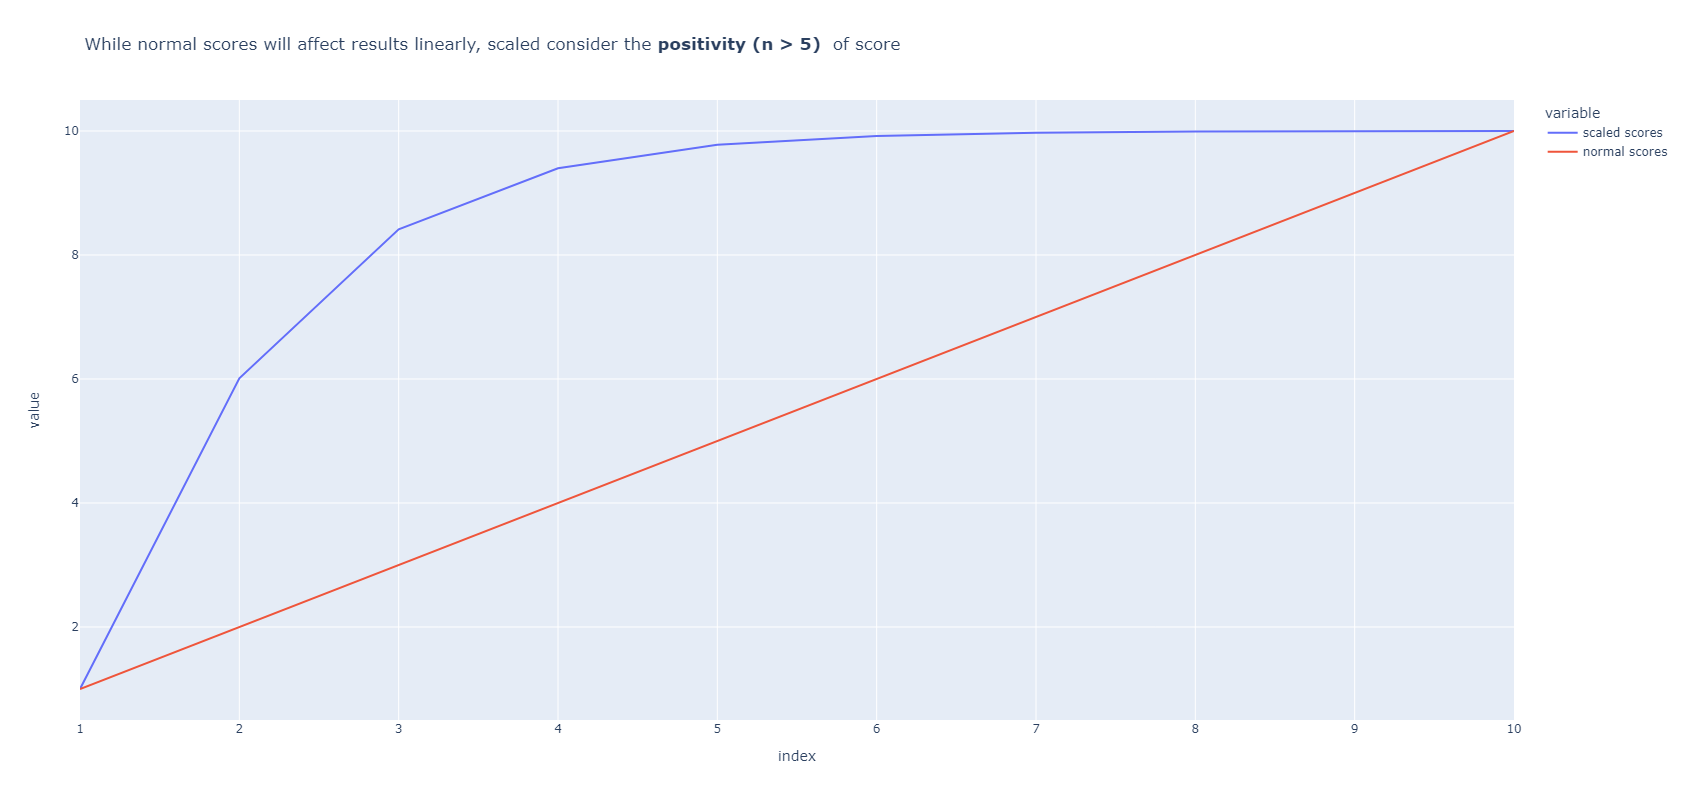

In [21]:
pd.options.plotting.backend = "plotly"
tmp = pd.DataFrame([[1/(1+np.exp(-i)) for i in ss.transform(np.arange(1, 11).reshape(-1, 1))], [i for i in minmax_scale(np.arange(1, 11), feature_range=(1, 10))]]).T.rename(columns ={0: 'scaled scores', 1: 'normal scores'})
tmp1 = pd.DataFrame(minmax_scale(tmp, feature_range=(1, 10)), columns =['scaled scores', 'normal scores']).set_index(np.arange(1, 11))
tmp1.plot(kind='line', title='While normal scores will affect results linearly, scaled consider the <b>positivity (n > 5) </b> of score', width=1200, height=800, labels=dict(x="Score"))

In [92]:
tmp1

,scaled scores,normal scores
1,1.000000,1.0
2,1.104212,2.0
3,1.375873,3.0
4,2.038213,4.0
5,3.419959,5.0
6,5.552106,6.0
7,7.684253,7.0
8,9.065999,8.0
9,9.728339,9.0
10,10.000000,10.0


In [54]:
pd.concat([tmp, tmp1], axis=1)

,scaled scores,normal scores,scaled scores,normal scores
0,0.006693,1.0,1.000000,1.0
1,0.017986,2.0,1.104212,2.0
2,0.047426,3.0,1.375873,3.0
3,0.119203,4.0,2.038213,4.0
4,0.268941,5.0,3.419959,5.0
5,0.500000,6.0,5.552106,6.0
6,0.731059,7.0,7.684253,7.0
7,0.880797,8.0,9.065999,8.0
8,0.952574,9.0,9.728339,9.0
9,0.982014,10.0,10.000000,10.0


In [483]:
new_df[~new_df['level_0'].isin(idx)].iloc[:50].title.to_frame()

,title
2,Fullmetal Alchemist: Brotherhood
3,Naruto: Shippuden
12,Re:ZERO -Starting Life in Another World- Seaso...
13,Monogatari Series Second Season
17,Naruto
19,Seraph of the End: Vampire Reign
20,Fruits Basket The Final Season
21,Re:ZERO -Starting Life in Another World- Season 2
26,Akame ga Kill!
27,Kaguya-sama: Love is War -Ultra Romantic-


In [370]:
df.iloc[np.argsort(-linear_kernel(vals[idx_sorted], vals).sum(axis=0))][:50].title.reset_index(drop=True)

0                      Fullmetal Alchemist: Brotherhood
1                          Attack on Titan Final Season
2                       Monogatari Series Second Season
3                                          VINLAND SAGA
4                                               Berserk
5                                          SPY x FAMILY
6                                             Charlotte
7            Rascal Does Not Dream of Bunny Girl Senpai
8                             My Hero Academia Season 4
9                                     Naruto: Shippuden
10                                   From the New World
11                  Attack on Titan Final Season Part 2
12                                           Elfen Lied
13                                              Monster
14                                         Platinum End
15                       Higurashi: When They Cry - GOU
16                 Code Geass: Lelouch of the Rebellion
17                                         Black

In [361]:
start = time.time()
tracemalloc.start()

res_vector = np.zeros((16714, ))

for i in range(1, int(np.round(idx.shape[0]/CHUNK_SIZE)+1)):
    # implement interruption method
    idx_part = idx_sorted[(i-1)*CHUNK_SIZE:i*CHUNK_SIZE]
    scores_part = scores_sorted[(i-1)*CHUNK_SIZE:i*CHUNK_SIZE]
    res_vector += calculate_vector(vals, idx_part, scores_part)

minmax_scale(res_vector)    
    
end = time.time()
_, peak = tracemalloc.get_traced_memory()
print(f"Peak {peak / 10**6:.2f} MB Time {end-start:.2f}s") 
tracemalloc.stop()

Peak 0.42 MB Time 0.00s
